In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import classification_report

In [3]:
base_dir = "/kaggle/input/e-commerce-shoppers-behaviour-understanding/"


In [4]:
train = pd.read_csv(base_dir + "train_data_v2.csv")
test = pd.read_csv(base_dir + "test_data_v2.csv")
sample = pd.read_csv(base_dir + "sample.csv")

In [5]:
print("Train Shape: " + str(train.shape))
print("Test Shape: " + str(test.shape))

Train Shape: (14731, 22)
Test Shape: (6599, 21)


In [6]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [7]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [8]:
sample.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [9]:
train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

<AxesSubplot:>

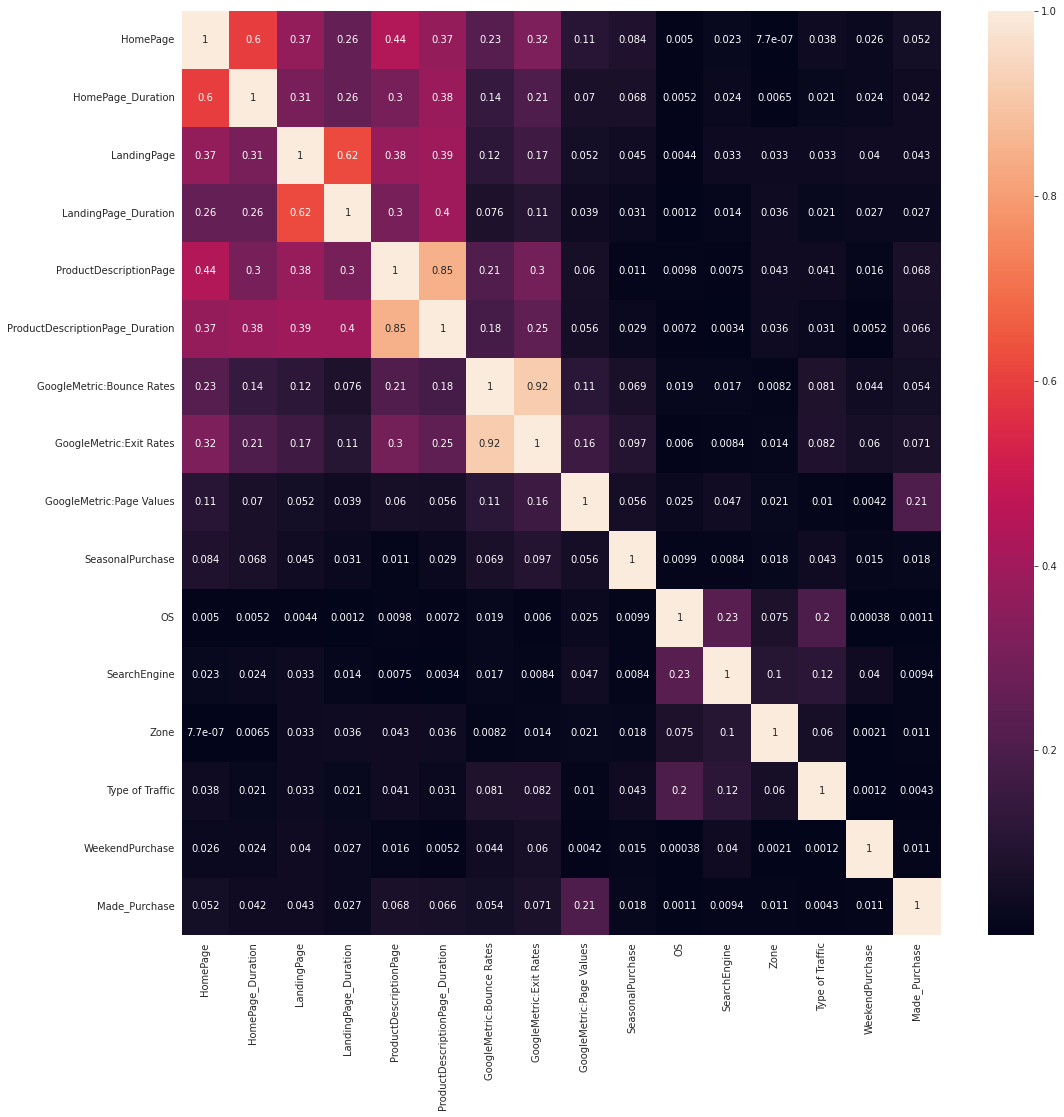

In [11]:
plt.figure(figsize=(17,17))
correlation = train.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<AxesSubplot:title={'center':'HomePage'}>,
        <AxesSubplot:title={'center':'HomePage_Duration'}>,
        <AxesSubplot:title={'center':'LandingPage'}>,
        <AxesSubplot:title={'center':'LandingPage_Duration'}>],
       [<AxesSubplot:title={'center':'ProductDescriptionPage'}>,
        <AxesSubplot:title={'center':'ProductDescriptionPage_Duration'}>,
        <AxesSubplot:title={'center':'GoogleMetric:Bounce Rates'}>,
        <AxesSubplot:title={'center':'GoogleMetric:Exit Rates'}>],
       [<AxesSubplot:title={'center':'GoogleMetric:Page Values'}>,
        <AxesSubplot:title={'center':'SeasonalPurchase'}>,
        <AxesSubplot:title={'center':'OS'}>,
        <AxesSubplot:title={'center':'SearchEngine'}>],
       [<AxesSubplot:title={'center':'Zone'}>,
        <AxesSubplot:title={'center':'Type of Traffic'}>,
        <AxesSubplot:title={'center':'WeekendPurchase'}>, <AxesSubplot:>]],
      dtype=object)

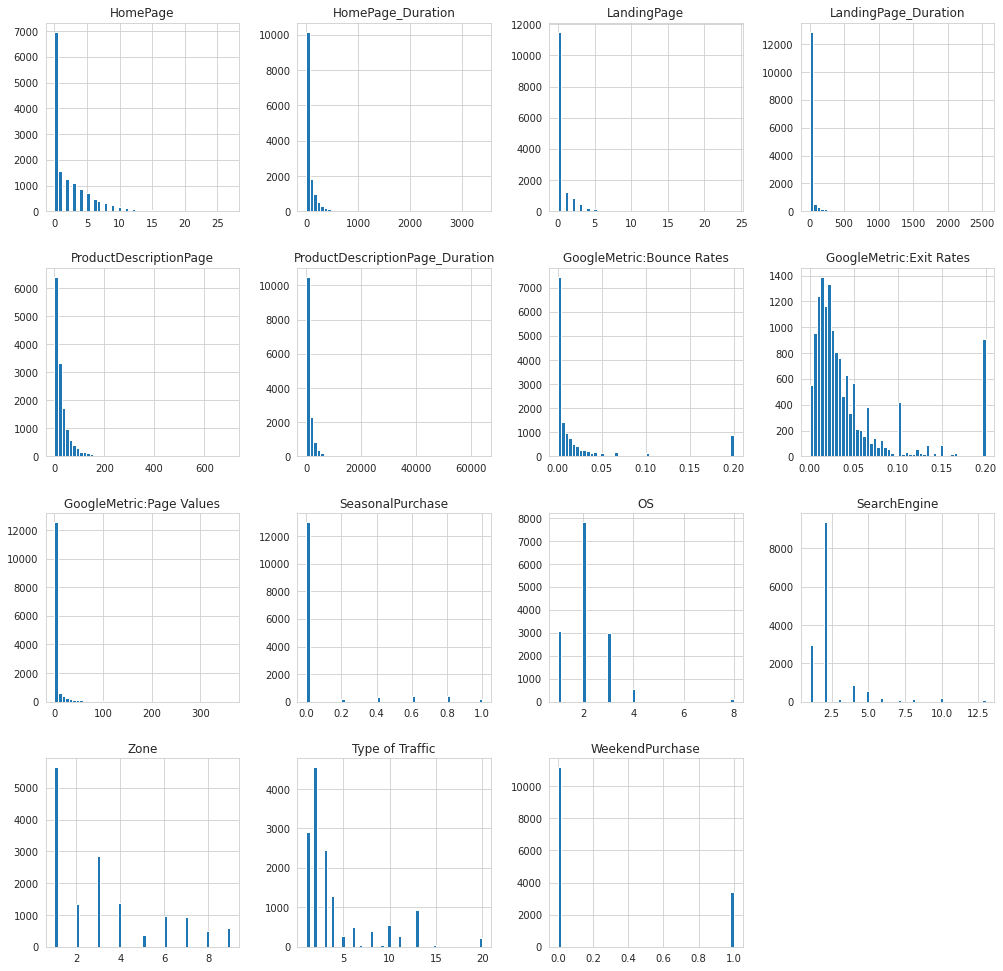

In [12]:
train.hist(bins=50, figsize=(17,17))

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

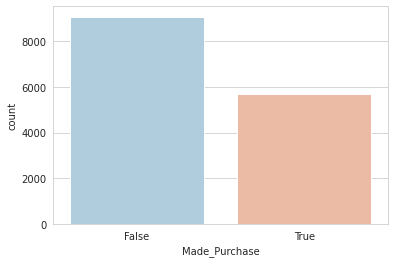

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Made_Purchase', data=train, palette='RdBu_r')

In [14]:
train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [15]:
test.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

In [16]:
X = train.drop(['Made_Purchase'], axis = 1)
X.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0


In [17]:
Y = train.iloc[:,-1:]
Y.head()
Y_main = Y.values.ravel()

In [18]:
numeric_features = ['HomePage',
                    'HomePage_Duration',
                    'LandingPage',
                    'LandingPage_Duration',
                    'ProductDescriptionPage',
                    'ProductDescriptionPage_Duration',
                    'GoogleMetric:Bounce Rates',
                    'GoogleMetric:Exit Rates',
                    'GoogleMetric:Page Values',
                    'Type of Traffic',
                    'SeasonalPurchase']

In [19]:
categorical_features = ['Month_SeasonalPurchase',
                        'CustomerType',
                        'OS',
                        'SearchEngine',
                        'Zone',                        
                        'Gender',
                        'Cookies Setting',
                        'Education',
                        'Marital Status',
                        'WeekendPurchase'
                        ]

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
             ("scaler", StandardScaler())
            ]
)

categorical_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
             ("ohe", OneHotEncoder(handle_unknown='ignore'))
            ]
)
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
    ], remainder='passthrough'
)


X_train_main = preprocessor.fit_transform(X)
print(X.shape)
print(X_train_main.shape)

test_f = preprocessor.fit_transform(test)
print(test_f.shape)

(14731, 21)
(14731, 69)
(6599, 69)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train_main, Y_main, test_size=0.1, random_state=44)

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [23]:
LR = LogisticRegression(max_iter=1000)
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()
GNB = GaussianNB()
KNN = KNeighborsClassifier()
SVC = SVC()
XGB = XGBClassifier()
GBC = GradientBoostingClassifier()
ADA = AdaBoostClassifier()
RC = RidgeClassifier()


In [24]:
from sklearn.ensemble import StackingClassifier


In [25]:
estimators = [
                ('LR', LR),
                ('DC', DC),
                ('RF', RF),
                ('GNB', GNB),
                ('KNN', KNN),
                ('SVC', SVC),
                ('XGB', XGB),
                ('GBC', GBC),
                ('ADA', ADA),
                ('RC', RC)
            ]

In [26]:
def evalm(a):
    a.fit(X_train, Y_train)
    y_pred = a.predict(X_test)

    return print(classification_report(Y_test, y_pred))

In [27]:
stack_model = StackingClassifier(estimators=estimators,
                                 final_estimator=SVC)


evalm(stack_model)


              precision    recall  f1-score   support

       False       0.80      0.85      0.82       936
        True       0.70      0.64      0.67       538

    accuracy                           0.77      1474
   macro avg       0.75      0.74      0.75      1474
weighted avg       0.77      0.77      0.77      1474



## Hyperparameter Tuning & Classification Reports

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

def hyperparam_tuning_eval(model, param_distributions, n_iter=100, cv=10):

    random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=n_iter, cv=cv, scoring='accuracy', verbose=0, n_jobs=-1)
    random_search.fit(X_train_main, Y_main)

    best_params = random_search.best_params_
    print("Best parameters:", best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(X_train, Y_train)

    y_pred = best_model.predict(X_test)
    return print(classification_report(Y_test, y_pred))

In [29]:
param_distributions = {
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
    'C' : np.arange(0, 1, 0.01)
}

hyperparam_tuning_eval(LR, param_distributions, n_iter=50)

Best parameters: {'warm_start': True, 'solver': 'newton-cg', 'C': 0.02}
              precision    recall  f1-score   support

       False       0.67      0.96      0.79       936
        True       0.71      0.19      0.30       538

    accuracy                           0.68      1474
   macro avg       0.69      0.57      0.54      1474
weighted avg       0.68      0.68      0.61      1474



In [30]:
param_distributions = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': uniform(0, 10)
}

hyperparam_tuning_eval(SVC, param_distributions, n_iter=50)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters: {'C': 0.6359585671566159, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

       False       0.67      0.96      0.79       936
        True       0.74      0.19      0.30       538

    accuracy                           0.68      1474
   macro avg       0.71      0.58      0.55      1474
weighted avg       0.70      0.68      0.61      1474



In [31]:
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': list(range(3, 20)),
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7]
}

hyperparam_tuning_eval(RF, param_distributions, n_iter=50)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}
              precision    recall  f1-score   support

       False       0.68      0.95      0.79       936
        True       0.72      0.20      0.32       538

    accuracy                           0.68      1474
   macro avg       0.70      0.58      0.55      1474
weighted avg       0.69      0.68      0.62      1474



In [32]:
param_distributions = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4, 5, 6, 8]
}

hyperparam_tuning_eval(DC, param_distributions, n_iter=50)

Best parameters: {'min_samples_split': 5, 'max_leaf_nodes': 3}
              precision    recall  f1-score   support

       False       0.69      0.88      0.77       936
        True       0.60      0.32      0.42       538

    accuracy                           0.67      1474
   macro avg       0.65      0.60      0.60      1474
weighted avg       0.66      0.67      0.64      1474



In [33]:
param_distributions = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


hyperparam_tuning_eval(GNB, param_distributions, n_iter=50)

Best parameters: {'var_smoothing': 0.3511191734215131}
              precision    recall  f1-score   support

       False       0.66      0.91      0.77       936
        True       0.54      0.18      0.27       538

    accuracy                           0.65      1474
   macro avg       0.60      0.55      0.52      1474
weighted avg       0.62      0.65      0.59      1474



In [34]:
param_distributions = { 
        'n_neighbors' : list(range(2, 20)),
        'leaf_size' : list(range(1, 50)),
        'weights' : ['uniform','distance'],
        'p' : [1,2]
}

hyperparam_tuning_eval(KNN, param_distributions, n_iter=50)

Best parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 18, 'leaf_size': 29}
              precision    recall  f1-score   support

       False       0.66      0.93      0.77       936
        True       0.56      0.14      0.23       538

    accuracy                           0.65      1474
   macro avg       0.61      0.54      0.50      1474
weighted avg       0.62      0.65      0.57      1474



In [35]:
param_distributions = { 
        'max_depth': [3, 5, 6, 8, 10, 12, 15, 20],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1],
        'subsample': np.arange(0.5, 1.0, 0.1),
        'colsample_bytree': np.arange(0.4, 1.0, 0.1),
        'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
        'n_estimators': [50, 100, 250, 500, 1000]
}

hyperparam_tuning_eval(XGB, param_distributions, n_iter=50)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters: {'subsample': 0.7, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
              precision    recall  f1-score   support

       False       0.69      0.92      0.79       936
        True       0.66      0.28      0.39       538

    accuracy                           0.68      1474
   macro avg       0.67      0.60      0.59      1474
weighted avg       0.68      0.68      0.64      1474



In [36]:
param_distributions = {
    'max_depth': [3, 5, 6, 8, 10, 12, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1],
    'n_estimators': [10, 50, 100, 250, 500, 1000]
}

hyperparam_tuning_eval(GBC, param_distributions, n_iter=50)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01}
              precision    recall  f1-score   support

       False       0.66      0.98      0.79       936
        True       0.77      0.14      0.24       538

    accuracy                           0.67      1474
   macro avg       0.72      0.56      0.52      1474
weighted avg       0.70      0.67      0.59      1474



In [37]:
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1],
    'n_estimators': [10, 50, 100, 250, 500, 1000]
}

hyperparam_tuning_eval(ADA, param_distributions, n_iter=50)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 42 is smaller than n_iter=50. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best parameters: {'n_estimators': 10, 'learning_rate': 0.1}
              precision    recall  f1-score   support

       False       0.69      0.93      0.79       936
        True       0.69      0.25      0.37       538

    accuracy                           0.69      1474
   macro avg       0.69      0.59      0.58      1474
weighted avg       0.69      0.69      0.64      1474



In [38]:
param_distributions = {
    'alpha' : np.arange(0, 1, 0.01)
}

hyperparam_tuning_eval(RC, param_distributions, n_iter=50)

Best parameters: {'alpha': 0.79}
              precision    recall  f1-score   support

       False       0.66      0.96      0.78       936
        True       0.69      0.15      0.25       538

    accuracy                           0.67      1474
   macro avg       0.68      0.56      0.52      1474
weighted avg       0.67      0.67      0.59      1474



### Tuned Stacking Model

In [39]:
stack_model = StackingClassifier(estimators=estimators,
                                 final_estimator=SVC)

evalm(stack_model)

              precision    recall  f1-score   support

       False       0.69      0.92      0.79       936
        True       0.66      0.28      0.40       538

    accuracy                           0.69      1474
   macro avg       0.68      0.60      0.59      1474
weighted avg       0.68      0.69      0.64      1474



## Final Submission

In [40]:
test_f = preprocessor.fit_transform(test)

print(test_f.shape)

(6599, 69)


In [41]:
test_f_pred = stack_model.predict(test_f)

print(len(test_f_pred))

6599


In [42]:
result_f = pd.DataFrame(columns=['id', 'Made_Purchase'])

result_f['id'] = [i for i in range(len(test_f_pred))]
result_f['Made_Purchase'] = test_f_pred
result_f

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False


In [43]:
result_f.to_csv('submission.csv', index=False)

In [44]:
print('done')

done
